<a href="https://colab.research.google.com/github/condusinew/jolted-UGs-1/blob/main/events%2Bif_seeded_SIR_mode_natimm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\frac{\mathrm{d}S}{\mathrm{d}t} = -(\beta_r I_r + \beta_v I_v)S$

$\frac{\mathrm{d}I_r}{\mathrm{d}t} = \beta_r I_r S - \gamma_r I_r$

$\frac{\mathrm{d}X}{\mathrm{d}t} = (1-\epsilon_a)\gamma_rI_r - \beta_v I_v X$

$\frac{\mathrm{d}W}{\mathrm{d}t} = \epsilon_a\gamma_rI_r - \beta_v I_v (\mu) W$


$\frac{\mathrm{d}I_v}{\mathrm{d}t} = \beta_v I_v S + \beta_v I_v X + \beta_v I_v (\mu) - \gamma_v I_v$

$\frac{\mathrm{d}I_v}{\mathrm{d}t} = \gamma_v I_v$

CHANGE N AND P TO X AND Y


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


In [ ]:
# SIR model equations
def SIR_model_rv(t, y, mu, betar, gammar, betav, gammav, epsilona, seed_days):
    S, Ir, X, W, Iv, Rv,  = y

    dSdt = -(betar*Ir + betav*Iv) * S
    dIrdt = betar * Ir * S - gammar * Ir

    #proportions calculated so that equal % can be substracted from immune compartments
    if X+W != 0:
      proportionX = X/(X+W)
      proportionW = 1-proportionX
    else:
      proportionX = 0
      proportionW = 0

    #if time is between the time condition is met + time + buffer days, add a seed term over course of buffer days
    #SEED DAYS NEEDS TO BE BIGGER IF RECOVERY IS LONGER...
    if tv <= t <= tv + seed_days:
        seed_term = 0.001/seed_days
        print("check")
    else:
        seed_term = 0.0


    dIvdt = betav*Iv*(S + X + mu*W) - gammav*Iv + seed_term
    dXdt = (1-epsilona)*gammar * Ir - betav*Iv*X - (proportionX*seed_term) #must substract proportion from somwhere
    dWdt = epsilona * gammar * Ir - betav*Iv*mu*W - (proportionW*seed_term)

    dRvdt = gammav * Iv

    return [dSdt, dIrdt, dXdt, dWdt, dIvdt, dRvdt]

In [ ]:
tv_TEMP = 100000
tv = tv_TEMP
seed_days = 1

# set parameter values
Rrnaught = 2
gammar = 1/4
betar = Rrnaught * gammar

Rvnaught = 1.7
gammav = 1/21
betav = Rvnaught * gammav

mu = 0.2
epsilona = 1
t = 200

# set initial conditions
S0 = 0.99
Ir0 = 0.01

X0 = 0
W0 = 0

Rv0 = 0
Iv0 = 1-(S0+Ir0+X0+W0+Rv0) #need to get this seeded later

if Iv0 < 0 or S0+Ir0+X0+W0+Iv0 != 1:
  raise ValueError('Check initial params sum to 1')

y0 = [S0, Ir0, X0, W0, Iv0, Rv0]


ODEINT VS SOLVE IVP


In [ ]:
def _reach_size10(t, y, mu, betar, gammar, betav, gammav, epsilona, seed_days):
    return (y[2]+y[3]) - 0.1

_reach_size10.terminate = True

#solve the SIR model equations to find tv
sol_findtv = solve_ivp(SIR_model_rv,
                     [0,t],
                     y0,
                     args=(mu, betar, gammar, betav, gammav, epsilona, seed_days),
                     #dense_output=True,
                     events=_reach_size10,
                     t_eval = np.linspace(0, t, 1000))

tv = np.ravel(np.array(sol_findtv.t_events))[0]



In [ ]:
#now solve, not to find tv, but use tv for final
sol = solve_ivp(SIR_model_rv,
                     [0,t],
                     y0,
                     args=(mu, betar, gammar, betav, gammav, epsilona, seed_days),
                     #dense_output=True,
                     t_eval = np.linspace(0, t, 1000))

check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check


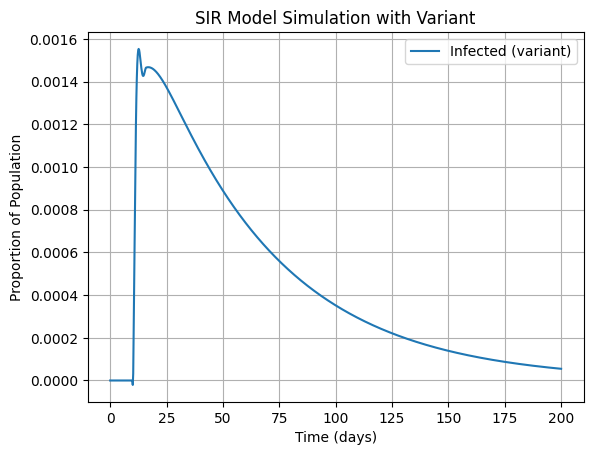

In [ ]:
# Extract time and solution arrays
t = sol.t
S, Ir, X, W, Iv, Rv = sol.y

#plt.figure(figsize=(10, 6))
#plt.plot(t, S, label='Susceptible')
#plt.plot(t, Ir, label='Infected (original)')
plt.plot(t, Iv, label='Infected (variant)')
#plt.plot(t, Rv, label='Recovered (variant)')
#plt.plot(t, X, label='Immunity_none')
#plt.plot(t, W, label='Immunity_leaky')

plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')
plt.title('SIR Model Simulation with Variant')
plt.legend()
plt.grid(True)
plt.show()
